# Load data 

In [1]:
import sys
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

from parse_logs import parser
from parse_logs.parse_base import LogDir

# parser.root_data_path = '../tests/data'
#trial_run_objects = parser.get_trial_runs(
#    exp_run_code='experiment_2021_04_01_16_20_00_run_1')

# parser.root_data_path = '../data'

# load trials run to dict (it can take a while)
LogDir.base_data_path = '../data'

trial_run_objects = parser.get_trial_runs(
    exec_code='experiment_2021_07_16_16_16_05_run_1')


trial_run_dicts = [trial_run.to_dict() for trial_run in trial_run_objects]

file experiment with wrong name format:
not enough values to unpack (expected 2, got 1)
ignoring experiment
file experiment with wrong name format:
not enough values to unpack (expected 2, got 1)
ignoring experiment
file experiment with wrong name format:
not enough values to unpack (expected 2, got 1)
ignoring experiment
file experiment with wrong name format:
not enough values to unpack (expected 2, got 1)
ignoring experiment
file experiment with wrong name format:
not enough values to unpack (expected 2, got 1)
ignoring experiment
file experiment with wrong name format:
not enough values to unpack (expected 2, got 1)
ignoring experiment
file experiment with wrong name format:
not enough values to unpack (expected 2, got 1)
ignoring experiment
file experiment with wrong name format:
not enough values to unpack (expected 2, got 1)
ignoring experiment


In [2]:
# sort and instantiate a dataframe
trial_run_dicts.sort(key=lambda tr: tr['trial_id'])
trial_run_dicts

trial_run_df = pd.DataFrame.from_records(trial_run_dicts)
trial_run_df

,trial_id,code,machine,treatment,ttc,failure_time,end_state,total_time_wall_clock,has_failure,factors_avg_speed,factors_battery_charge,factors_battery_discharge_rate,factors_skills,factors_location
0,1,aaaaap,les-02,planned,532.683333,NaN,reach-target,678.756781,False,a,a,a,a,a
1,1,aaaaab,les-02,baseline,NaN,NaN,timeout-sim,1105.196014,False,a,a,a,a,a
2,1,aaaaap,les-05,planned,495.766667,NaN,reach-target,610.652392,False,a,a,a,a,a
3,1,aaaaab,les-05,baseline,424.266667,NaN,reach-target,559.581255,False,a,a,a,a,a
4,1,aaaaap,les-04,planned,466.116667,NaN,reach-target,580.636589,False,a,a,a,a,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,81,accccp,les-08,planned,NaN,NaN,timeout-sim,1103.245536,False,a,c,c,c,c
1275,81,accccb,les-06,baseline,200.716667,NaN,reach-target,238.238989,False,a,c,c,c,c
1276,81,accccp,les-06,planned,358.650000,NaN,reach-target,421.440350,False,a,c,c,c,c
1277,81,accccb,les-07,baseline,194.400000,NaN,reach-target,235.240533,False,a,c,c,c,c


## Baseline

In [3]:
baseline_df = trial_run_df[trial_run_df.treatment == 'baseline']
baseline_df

,trial_id,code,machine,treatment,ttc,failure_time,end_state,total_time_wall_clock,has_failure,factors_avg_speed,factors_battery_charge,factors_battery_discharge_rate,factors_skills,factors_location
1,1,aaaaab,les-02,baseline,NaN,NaN,timeout-sim,1105.196014,False,a,a,a,a,a
3,1,aaaaab,les-05,baseline,424.266667,NaN,reach-target,559.581255,False,a,a,a,a,a
5,1,aaaaab,les-04,baseline,379.300000,NaN,reach-target,519.533063,False,a,a,a,a,a
7,1,aaaaab,les-03,baseline,396.950000,NaN,reach-target,532.560485,False,a,a,a,a,a
9,1,aaaaab,les-08,baseline,347.616667,NaN,reach-target,469.486996,False,a,a,a,a,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,81,accccb,les-04,baseline,189.916667,NaN,reach-target,239.252352,False,a,c,c,c,c
1271,81,accccb,les-03,baseline,204.066667,NaN,reach-target,245.249477,False,a,c,c,c,c
1273,81,accccb,les-08,baseline,190.883333,NaN,reach-target,239.242548,False,a,c,c,c,c
1275,81,accccb,les-06,baseline,200.716667,NaN,reach-target,238.238989,False,a,c,c,c,c


# Planned

In [4]:
planned_df = trial_run_df[trial_run_df.treatment == 'planned']
planned_df

,trial_id,code,machine,treatment,ttc,failure_time,end_state,total_time_wall_clock,has_failure,factors_avg_speed,factors_battery_charge,factors_battery_discharge_rate,factors_skills,factors_location
0,1,aaaaap,les-02,planned,532.683333,NaN,reach-target,678.756781,False,a,a,a,a,a
2,1,aaaaap,les-05,planned,495.766667,NaN,reach-target,610.652392,False,a,a,a,a,a
4,1,aaaaap,les-04,planned,466.116667,NaN,reach-target,580.636589,False,a,a,a,a,a
6,1,aaaaap,les-03,planned,481.383333,NaN,reach-target,604.655203,False,a,a,a,a,a
8,1,aaaaap,les-08,planned,436.816667,NaN,reach-target,549.601302,False,a,a,a,a,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,81,accccp,les-04,planned,NaN,NaN,timeout-sim,1134.264000,False,a,c,c,c,c
1272,81,accccp,les-03,planned,NaN,NaN,timeout-sim,1120.274925,False,a,c,c,c,c
1274,81,accccp,les-08,planned,NaN,NaN,timeout-sim,1103.245536,False,a,c,c,c,c
1276,81,accccp,les-06,planned,358.650000,NaN,reach-target,421.440350,False,a,c,c,c,c


In [5]:
# Average TCC

planned_ttc_avg = planned_df['ttc'].mean()
planned_ttc_avg

526.7635789575202

In [6]:
# by machine (no trial run dummy aparece o mesmo porque a pasta foi copiada)
(planned_df[planned_df.machine == 'les-01']['ttc'].mean(),
planned_df[planned_df.machine == 'les-02']['ttc'].mean(),
planned_df[planned_df.machine == 'les-03']['ttc'].mean())


(526.9577381057678, 532.7638461809998, 535.0717514288984)

In [7]:
# comparing factors (no dummy os fatores não foram distinguidos, porque teria que renomear os arquivos)
(planned_df[planned_df.factors_battery_charge == 'x']['ttc'].mean(),
 planned_df[planned_df.factors_battery_charge == 'x']['ttc'].mean())

(nan, nan)

# Statistics

## Number of each event
i.e. how many times did the simulation achieve each status

In [8]:
# baseline_nums = [{col: None for col in baseline_df} for _ in range(num_experiments)]
# for col in baseline_df:
#     for i in range(num_experiments):
#         try:
#             baseline_nums[i][col] = len(baseline_df.loc[i][col])
#         except TypeError:
#             baseline_nums[i][col] = 0

by_end_state = trial_run_df.groupby(['end_state', 'treatment'])['end_state']
by_end_state.count()
# planned_by_end_state_df = planned_df.groupby('end_state')['end_state'].count()
# pd.merge(baseline_by_end_state_df, planned_by_end_state_df, on='end_state')

end_state     treatment
failure-bt    baseline     256
              planned       54
low-battery   baseline       3
              planned        9
reach-target  baseline     334
              planned      480
timeout-sim   baseline      12
              planned       71
timeout-wall  baseline      35
              planned       25
Name: end_state, dtype: int64

In [9]:
trial_run_df.groupby(['trial_id', 'code', 'treatment'])['end_state'].value_counts()

trial_id  code    treatment  end_state   
1         aaaaab  baseline   reach-target    7
                             timeout-sim     1
          aaaaap  planned    reach-target    5
                             timeout-sim     2
                             failure-bt      1
                                            ..
80        acccbb  baseline   timeout-wall    1
          acccbp  planned    reach-target    7
81        accccb  baseline   reach-target    7
          accccp  planned    reach-target    4
                             timeout-sim     3
Name: end_state, Length: 320, dtype: int64

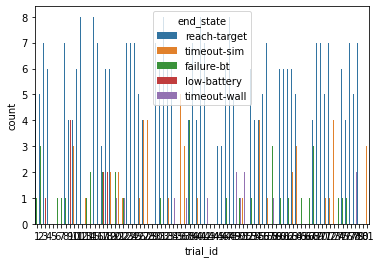

In [10]:
planned_run_df = trial_run_df[trial_run_df["treatment"] == "planned"]
ax_planned = sns.countplot(x='trial_id', hue="end_state", data=planned_run_df)

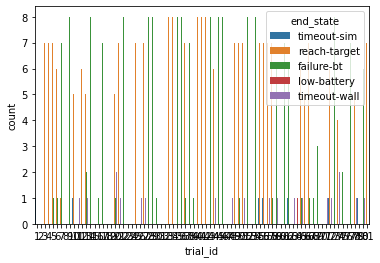

In [11]:
baseline_run_df = trial_run_df[trial_run_df["treatment"] == "baseline"]
ax_baseline = sns.countplot(x='trial_id', hue="end_state", data=baseline_run_df)

## Time to Conclusion

<AxesSubplot:xlabel='trial_id', ylabel='ttc'>

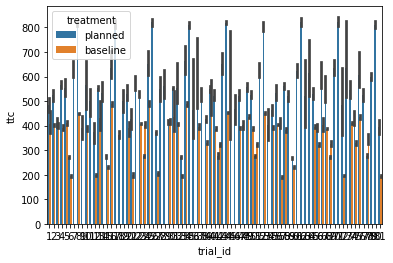

In [12]:
sns.barplot(x='trial_id', y='ttc', hue='treatment', data=trial_run_df, estimator=np.mean)

## STD

In [13]:
by_end_state_avg = trial_run_df.groupby(['end_state', 'treatment'])['ttc']
by_end_state_avg.std()

end_state     treatment
failure-bt    baseline            NaN
              planned             NaN
low-battery   baseline            NaN
              planned             NaN
reach-target  baseline      97.641662
              planned      160.819657
timeout-sim   baseline            NaN
              planned             NaN
timeout-wall  baseline            NaN
              planned             NaN
Name: ttc, dtype: float64

# Plots

## Successes per trial

<AxesSubplot:xlabel='trial_id', ylabel='count'>

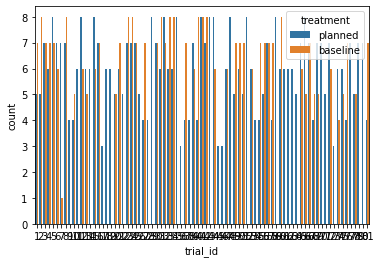

In [14]:
sns.countplot(x='trial_id', hue="treatment", data=trial_run_df[trial_run_df["end_state"] == "reach-target"])

### Average time to reach target

NameError: name 'time' is not defined

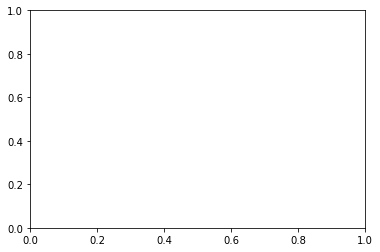

In [15]:
_, ax = plt.subplots()
time["Planned Average Time"].plot.bar(stacked=True, figsize=(16, 8), ax=ax, color="blue", legend=True)
time["Baseline Average Time"].plot.bar(stacked=True, figsize=(16, 8), ax=ax, color="orange", legend=True)

In [ ]:
time.plot.bar(figsize=(16, 8))

# Metrics
## Metric1 - Success

In [ ]:
metric1 = {"Metric 1": [planned_suc/baseline_suc for planned_suc, baseline_suc in 
                        zip(planned_df.groupby("end_state")["trial_id"].value_counts()["reach-target"],
                            baseline_df.groupby("end_state")["trial_id"].value_counts()["reach-target"])]}
metric1 = pd.DataFrame(metric1)
metric1

In [ ]:
metric1.plot.bar(figsize=(16, 8))

## Metric2 - TTC

In [ ]:
metric2 = {"Metric 2": [planned_ttc/baseline_ttc for planned_ttc, baseline_ttc in 
                        zip(planned_df.groupby("end_state")["ttc"].value_counts()["reach-target"],
                            baseline_df.groupby("end_state")["ttc"].value_counts()["reach-target"])]}
metric2 = pd.DataFrame(metric2)
metric2

In [ ]:
metric2.plot.bar(figsize=(16, 8))